**Target**

In [94]:
# !pip install geopandas
# !pip install wordcloud
# For graphs
# !pip install plotly
# For exporting graph as image
# !pip install kaleido
# !pip install shap

**Importing neccesary modules**

In [158]:
#import all the neccesary modules
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import calendar
import datetime
import pytz
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

**Import Dataset**

In [96]:
df_raw = pd.read_csv('./Solar Radiation.csv')
df = df_raw

In [97]:
# time is in reverse order, therefore order ascending
df = df.sort_values(by='UNIXTime', ascending=True).reset_index(drop=True)

**Lets have a quick look at data**

In [98]:
df.shape

(32686, 11)

In [99]:
#Lets see the first 10 rows
df.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1472724008,9/1/16 0:00,0:00:08,2.58,51,30.43,103,77.27,11.25,6:07:00,18:38:00
1,1472724310,9/1/16 0:00,0:05:10,2.83,51,30.43,103,153.44,9.00,6:07:00,18:38:00
2,1472725206,9/1/16 0:00,0:20:06,2.16,51,30.43,103,142.04,7.87,6:07:00,18:38:00
3,1472725505,9/1/16 0:00,0:25:05,2.21,51,30.43,103,144.12,18.00,6:07:00,18:38:00
4,1472725809,9/1/16 0:00,0:30:09,2.25,51,30.43,103,67.42,11.25,6:07:00,18:38:00
5,1472726704,9/1/16 0:00,0:45:04,2.15,51,30.43,103,67.85,4.50,6:07:00,18:38:00
6,1472727006,9/1/16 0:00,0:50:06,2.07,51,30.43,103,156.58,1.12,6:07:00,18:38:00
7,1472727304,9/1/16 0:00,0:55:04,2.06,52,30.43,103,69.98,7.87,6:07:00,18:38:00
8,1472727607,9/1/16 0:00,1:00:07,2.10,52,30.43,103,92.15,4.50,6:07:00,18:38:00
9,1472727905,9/1/16 0:00,1:05:05,2.07,52,30.42,103,68.17,4.50,6:07:00,18:38:00


In [100]:
#Lets look at the last 10 rows
df.tail(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
32676,1483261802,12/31/16 0:00,23:10:02,1.20,41,30.34,82,224.45,5.62,6:57:00,17:54:00
32677,1483262102,12/31/16 0:00,23:15:02,1.18,40,30.34,82,228.08,6.75,6:57:00,17:54:00
32678,1483262404,12/31/16 0:00,23:20:04,1.22,40,30.34,83,229.37,7.87,6:57:00,17:54:00
32679,1483262701,12/31/16 0:00,23:25:01,1.19,40,30.34,83,234.75,6.75,6:57:00,17:54:00
32680,1483263002,12/31/16 0:00,23:30:02,1.20,40,30.34,83,236.93,5.62,6:57:00,17:54:00
32681,1483263302,12/31/16 0:00,23:35:02,1.22,41,30.34,83,238.94,6.75,6:57:00,17:54:00
32682,1483263601,12/31/16 0:00,23:40:01,1.21,41,30.34,82,236.79,5.62,6:57:00,17:54:00
32683,1483263904,12/31/16 0:00,23:45:04,1.21,42,30.34,81,218.28,7.87,6:57:00,17:54:00
32684,1483264203,12/31/16 0:00,23:50:03,1.19,41,30.34,80,215.23,7.87,6:57:00,17:54:00
32685,1483264501,12/31/16 0:00,23:55:01,1.21,41,30.34,81,215.56,9.00,6:57:00,17:54:00


In [101]:
#Lets use the count function
df.count()

UNIXTime                  32686
Data                      32686
Time                      32686
Radiation                 32686
Temperature               32686
Pressure                  32686
Humidity                  32686
WindDirection(Degrees)    32686
Speed                     32686
TimeSunRise               32686
TimeSunSet                32686
dtype: int64

In [102]:
#Lets use the info function 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [103]:
#Lets count the null values
df.isnull().value_counts()

UNIXTime  Data   Time   Radiation  Temperature  Pressure  Humidity  WindDirection(Degrees)  Speed  TimeSunRise  TimeSunSet
False     False  False  False      False        False     False     False                   False  False        False         32686
dtype: int64

In [104]:
#Lets sum all the null values
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

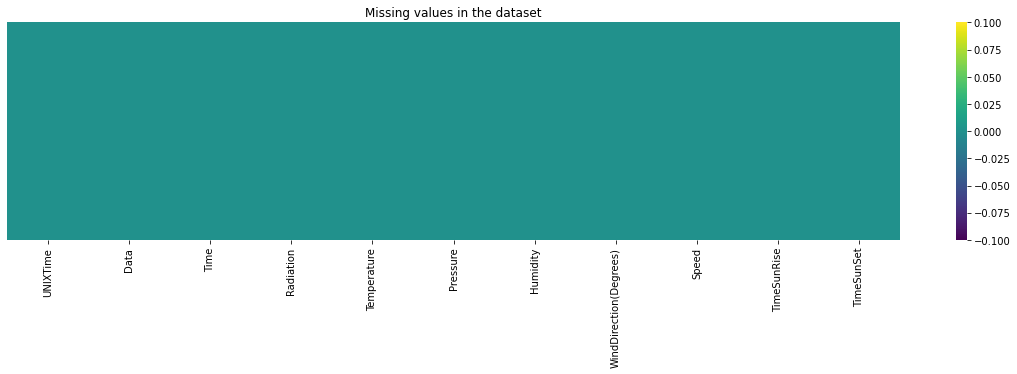

In [105]:
#Lets make a heat map plot to check missing values in the dataset
plt.figure(figsize=(20,4))
sns.heatmap(df.isnull(),cbar=True,cmap='viridis',yticklabels=False)
plt.title('Missing values in the dataset');

**As we can see that the count is same for all of the columns which is 3286. So there is no missing data**

**Let's convert integer column values to float values**

In [106]:
df.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature                 int64
Pressure                  float64
Humidity                    int64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [107]:
df=df.astype({'Temperature': 'float64', 'Humidity': 'float64'})

In [108]:
df.dtypes

UNIXTime                    int64
Data                       object
Time                       object
Radiation                 float64
Temperature               float64
Pressure                  float64
Humidity                  float64
WindDirection(Degrees)    float64
Speed                     float64
TimeSunRise                object
TimeSunSet                 object
dtype: object

In [109]:
df.head(10)

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1472724008,9/1/16 0:00,0:00:08,2.58,51.0,30.43,103.0,77.27,11.25,6:07:00,18:38:00
1,1472724310,9/1/16 0:00,0:05:10,2.83,51.0,30.43,103.0,153.44,9.00,6:07:00,18:38:00
2,1472725206,9/1/16 0:00,0:20:06,2.16,51.0,30.43,103.0,142.04,7.87,6:07:00,18:38:00
3,1472725505,9/1/16 0:00,0:25:05,2.21,51.0,30.43,103.0,144.12,18.00,6:07:00,18:38:00
4,1472725809,9/1/16 0:00,0:30:09,2.25,51.0,30.43,103.0,67.42,11.25,6:07:00,18:38:00
5,1472726704,9/1/16 0:00,0:45:04,2.15,51.0,30.43,103.0,67.85,4.50,6:07:00,18:38:00
6,1472727006,9/1/16 0:00,0:50:06,2.07,51.0,30.43,103.0,156.58,1.12,6:07:00,18:38:00
7,1472727304,9/1/16 0:00,0:55:04,2.06,52.0,30.43,103.0,69.98,7.87,6:07:00,18:38:00
8,1472727607,9/1/16 0:00,1:00:07,2.10,52.0,30.43,103.0,92.15,4.50,6:07:00,18:38:00
9,1472727905,9/1/16 0:00,1:05:05,2.07,52.0,30.42,103.0,68.17,4.50,6:07:00,18:38:00


**Let's have look at the mean, count, minimum and maximum values about the data**

In [110]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


**As we can see in above, there is quite a difference between mean(207.124697) and median(2.66) of our target variable.**

**This indicates that there are outliers in our dataset and need to be taken care of.**

**Let's visualize the outliers using Box Plot**

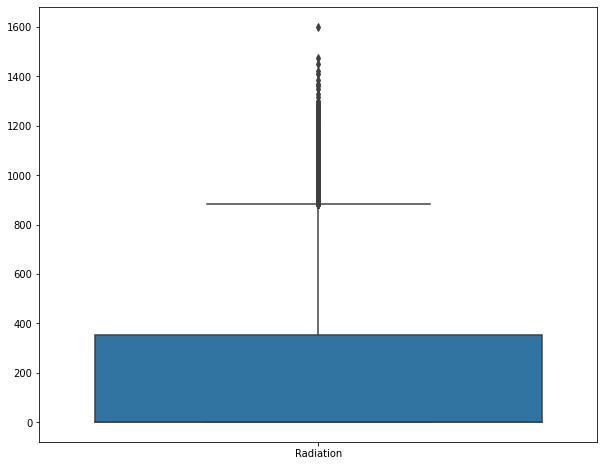

In [111]:
#Boxplot
df_box = pd.DataFrame(df_raw, columns=['Radiation'])
sns.boxplot(data=df_box)

**Let's remove these outliers using IQR (Inter Quartile Range).**

In [112]:
Q1 = df.Radiation.quantile(0.25)
Q1

1.23

In [113]:
Q3 = df.Radiation.quantile(0.75)
Q3

354.235

In [114]:
#The Inter Quartile Range formula
IQR = Q3 - Q1
IQR

353.005

In [115]:
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

lower_limit, upper_limit

(-528.2774999999999, 883.7425)

In [116]:
#The rows in between lower and upper limt
df[(df.Radiation < lower_limit) | (df.Radiation > upper_limit)]

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
101,1472759707,9/1/16 0:00,9:55:07,899.06,57.0,30.47,76.0,109.50,7.87,6:07:00,18:38:00
102,1472760007,9/1/16 0:00,10:00:07,928.27,57.0,30.47,77.0,37.85,4.50,6:07:00,18:38:00
103,1472760309,9/1/16 0:00,10:05:09,999.94,57.0,30.47,76.0,80.80,9.00,6:07:00,18:38:00
104,1472760606,9/1/16 0:00,10:10:06,916.47,57.0,30.47,76.0,71.14,4.50,6:07:00,18:38:00
105,1472760905,9/1/16 0:00,10:15:05,986.69,58.0,30.47,73.0,140.16,13.50,6:07:00,18:38:00
...,...,...,...,...,...,...,...,...,...,...,...
31689,1482964557,12/28/16 0:00,12:35:57,1045.66,52.0,30.38,89.0,55.33,9.00,6:56:00,17:52:00
31695,1482966350,12/28/16 0:00,13:05:50,1157.27,52.0,30.37,93.0,359.81,4.50,6:56:00,17:52:00
31698,1482967240,12/28/16 0:00,13:20:40,1079.18,51.0,30.36,92.0,95.29,7.87,6:56:00,17:52:00
32537,1483220102,12/31/16 0:00,11:35:02,1026.34,52.0,30.33,68.0,308.04,11.25,6:57:00,17:54:00


In [117]:
df_no_outlier = df[(df.Radiation > lower_limit) & (df.Radiation < upper_limit)]
df_no_outlier 
df = df_no_outlier

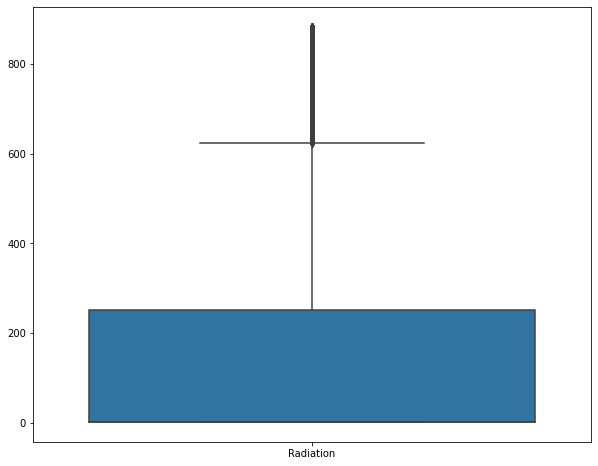

In [118]:
#lets visualize the box plot for radiation
df_no_outlier_box = pd.DataFrame(df_no_outlier, columns=['Radiation'])
sns.boxplot(data=df_no_outlier_box)

**Visualizing and Examining the Dataset**

**Let's see what is the relation between the features**

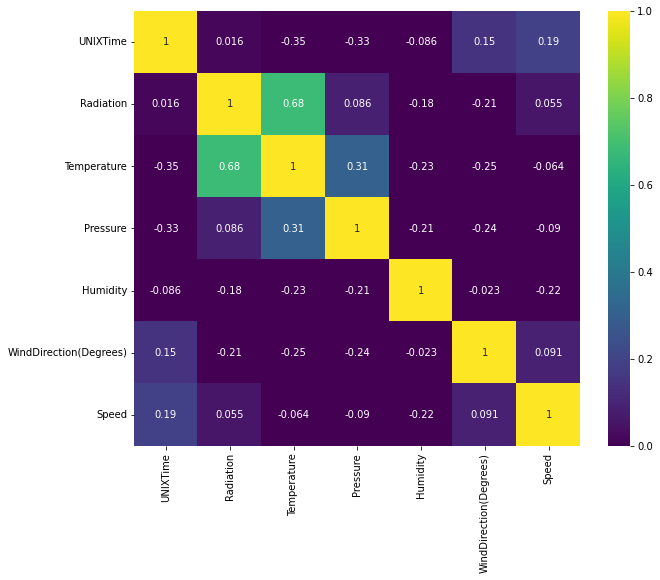

In [119]:
# Correlation Plot
plt.rcParams['figure.figsize'] = 10, 8
sns.heatmap(df.corr(), vmin=0, vmax=1, annot=True, cmap="viridis")

**As can be seen from above correlation plot that there is positive relation between Temperature and Radiation**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bed94e210>,
      dtype=object)

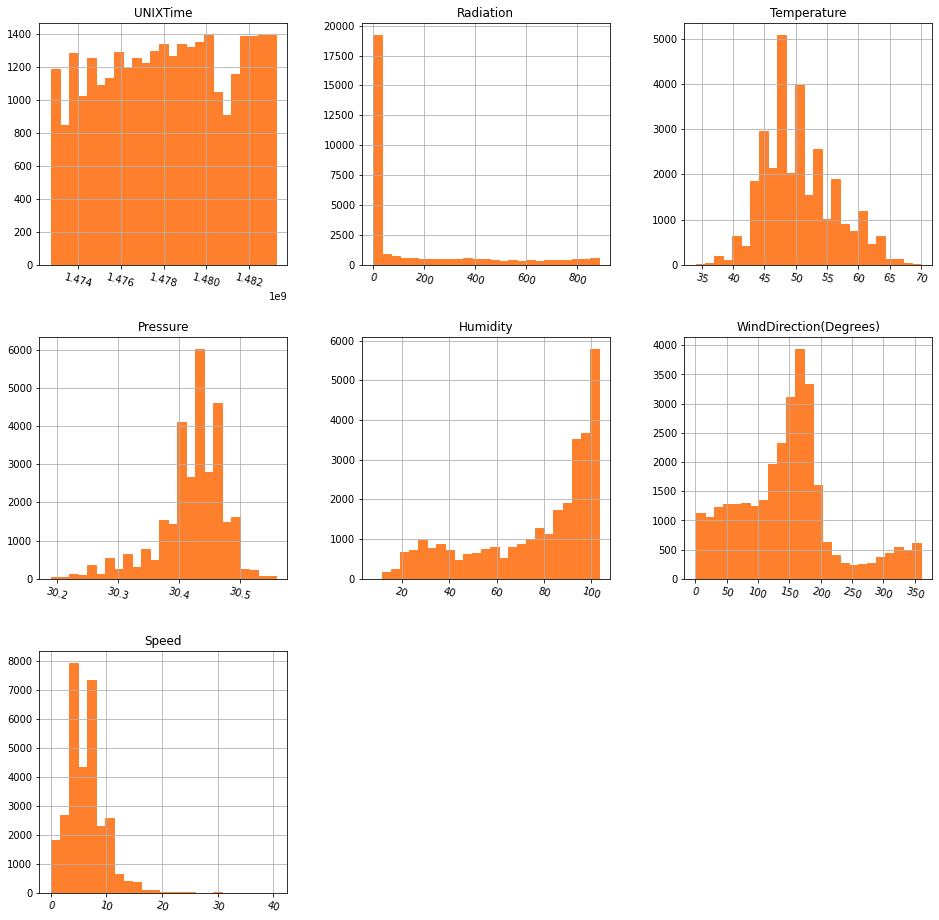

In [120]:
#Lets Visualize a Histogram for the paramters
df.hist(figsize=(16,16), xrot=-15, bins=25, color="#FF802C", ec='#FF802C')

In [121]:
#The dataframe
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1472724008,9/1/16 0:00,0:00:08,2.58,51.0,30.43,103.0,77.27,11.25,6:07:00,18:38:00
1,1472724310,9/1/16 0:00,0:05:10,2.83,51.0,30.43,103.0,153.44,9.00,6:07:00,18:38:00
2,1472725206,9/1/16 0:00,0:20:06,2.16,51.0,30.43,103.0,142.04,7.87,6:07:00,18:38:00
3,1472725505,9/1/16 0:00,0:25:05,2.21,51.0,30.43,103.0,144.12,18.00,6:07:00,18:38:00
4,1472725809,9/1/16 0:00,0:30:09,2.25,51.0,30.43,103.0,67.42,11.25,6:07:00,18:38:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1483263302,12/31/16 0:00,23:35:02,1.22,41.0,30.34,83.0,238.94,6.75,6:57:00,17:54:00
32682,1483263601,12/31/16 0:00,23:40:01,1.21,41.0,30.34,82.0,236.79,5.62,6:57:00,17:54:00
32683,1483263904,12/31/16 0:00,23:45:04,1.21,42.0,30.34,81.0,218.28,7.87,6:57:00,17:54:00
32684,1483264203,12/31/16 0:00,23:50:03,1.19,41.0,30.34,80.0,215.23,7.87,6:57:00,17:54:00


**Histogram above shows us how often each different value in a dataset occurs which is the frequency distribution**

**We can see that data in Radiation is left-skewed and Humidity data is right-skewed.**

**To remove the skewness we will apply Box-Cox transform which reduces skewness to least.**

In [122]:
# Skewness before
print('Radiation skewness:', df['Radiation'].skew())
print('Humidity skewness:', df['Humidity'].skew())

Radiation skewness: 1.515031933365721
Humidity skewness: -0.8495101030920267


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9bed4bd750>,
      dtype=object)

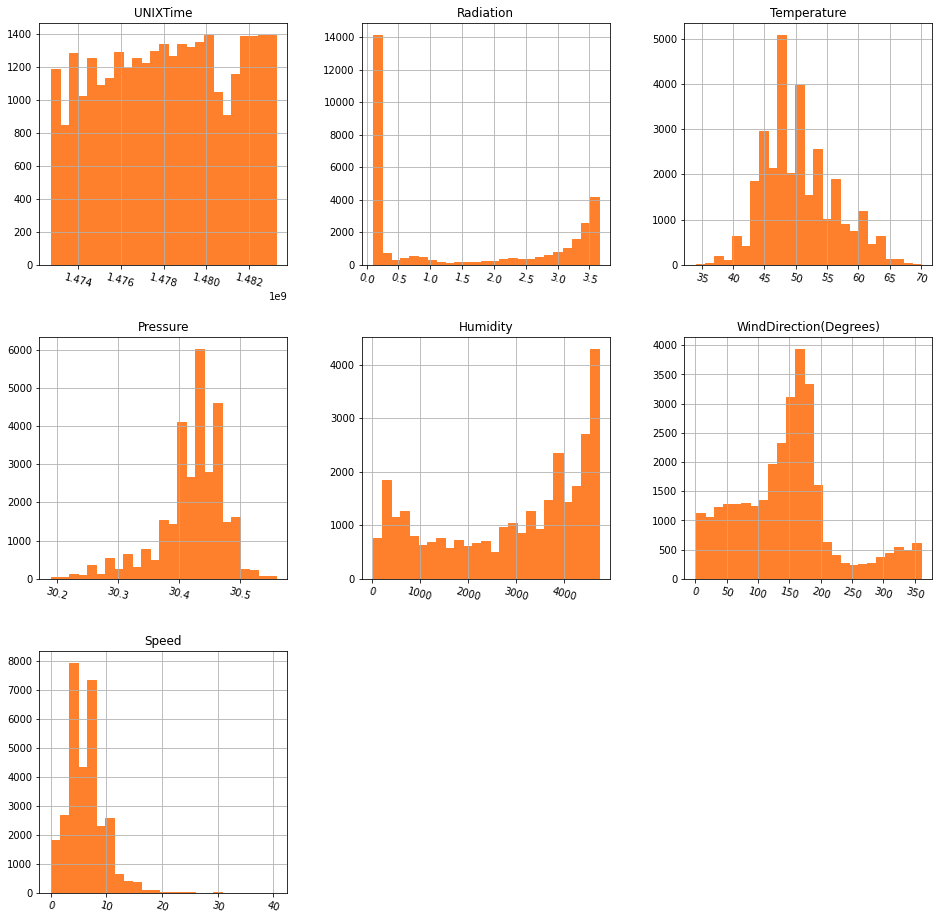

In [123]:
#Visualize the Historgram after removing Skewness
humidity_boxcox = stats.boxcox(df['Humidity'])[0]
radiation_boxcox = stats.boxcox(df['Radiation'])[0]
df_copy = df.copy()
df_copy['Humidity'] = humidity_boxcox
df_copy['Radiation'] = radiation_boxcox
df = df_copy.copy()
df_copy.hist(figsize=(16,16), xrot=-15, bins=25, color="#FF802C", ec='#FF802C')

In [124]:
# Skewness after applying boxcox
print('Radiation skewness:', df['Radiation'].skew())
print('Humidity skewness:', df['Humidity'].skew())

Radiation skewness: 0.34270610611595365
Humidity skewness: -0.5010428421520257


**As we can see that the skewness of Humidity and Radiation is reduced and we have handled the skewness.**

**Now convert time to date_time for easy intrepretation and visualization**

In [125]:
df['conv_time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
#set Hawaii timezone
Hawaii_tz = pytz.timezone(zone='US/Hawaii')
datetimeHI = df['UNIXTime'].apply(lambda x: datetime.datetime.utcfromtimestamp(x).replace(tzinfo=pytz.utc).astimezone(Hawaii_tz))
df['HawaiiDateTime'] = datetimeHI

# Store Hour
df['hour'] = pd.to_datetime(df['conv_time'], format='%H:%M:%S').dt.hour

# Store Minute
df['minute'] = pd.to_datetime(df['conv_time'], format='%H:%M:%S').dt.minute

# Store Seconds
df['seconds'] = pd.to_datetime(df['conv_time'], format='%H:%M:%S').dt.second

# Store Year
df['year'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.year

# Store Month
df['month'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.month
df['month_name'] = pd.to_datetime(df['UNIXTime'].astype(int), unit='s').dt.month.apply(lambda x: calendar.month_abbr[x])


#Total length of the day
df['day_length'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S').dt.hour - \
pd.to_datetime(df['TimeSunRise'],format=('%H:%M:%S')).dt.hour

**Let's see how Radation, Humidity is spread by hour, month**

In [126]:
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,conv_time,HawaiiDateTime,hour,minute,seconds,year,month,month_name,day_length
0,1472724008,9/1/16 0:00,0:00:08,0.860545,51.0,30.43,4713.681588,77.27,11.25,6:07:00,18:38:00,1900-01-01 00:00:08,2016-09-01 00:00:08-10:00,0,0,8,2016,9,Sep,12
1,1472724310,9/1/16 0:00,0:05:10,0.935821,51.0,30.43,4713.681588,153.44,9.00,6:07:00,18:38:00,1900-01-01 00:05:10,2016-09-01 00:05:10-10:00,0,5,10,2016,9,Sep,12
2,1472725206,9/1/16 0:00,0:20:06,0.711819,51.0,30.43,4713.681588,142.04,7.87,6:07:00,18:38:00,1900-01-01 00:20:06,2016-09-01 00:20:06-10:00,0,20,6,2016,9,Sep,12
3,1472725505,9/1/16 0:00,0:25:05,0.731283,51.0,30.43,4713.681588,144.12,18.00,6:07:00,18:38:00,1900-01-01 00:25:05,2016-09-01 00:25:05-10:00,0,25,5,2016,9,Sep,12
4,1472725809,9/1/16 0:00,0:30:09,0.746475,51.0,30.43,4713.681588,67.42,11.25,6:07:00,18:38:00,1900-01-01 00:30:09,2016-09-01 00:30:09-10:00,0,30,9,2016,9,Sep,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32681,1483263302,12/31/16 0:00,23:35:02,0.194811,41.0,30.34,3079.603478,238.94,6.75,6:57:00,17:54:00,1900-01-01 23:35:02,2016-12-31 23:35:02-10:00,23,35,2,2017,1,Jan,11
32682,1483263601,12/31/16 0:00,23:40:01,0.186906,41.0,30.34,3006.871926,236.79,5.62,6:57:00,17:54:00,1900-01-01 23:40:01,2016-12-31 23:40:01-10:00,23,40,1,2017,1,Jan,11
32683,1483263904,12/31/16 0:00,23:45:04,0.186906,42.0,30.34,2934.996940,218.28,7.87,6:57:00,17:54:00,1900-01-01 23:45:04,2016-12-31 23:45:04-10:00,23,45,4,2017,1,Jan,11
32684,1483264203,12/31/16 0:00,23:50:03,0.170856,41.0,30.34,2863.978821,215.23,7.87,6:57:00,17:54:00,1900-01-01 23:50:03,2016-12-31 23:50:03-10:00,23,50,3,2017,1,Jan,11


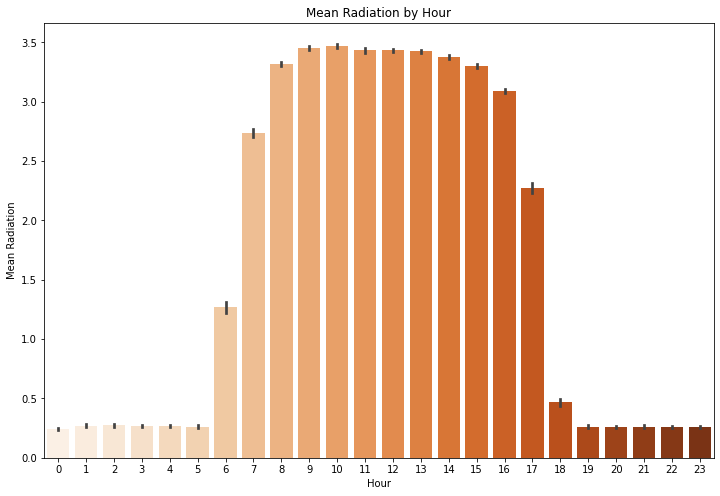

In [127]:
# Radiation by Hour
plt.rcParams['figure.figsize'] = 12, 8
ax = sns.barplot(data=df, x='hour', y='Radiation', palette = 'Oranges')
ax.set(title='Mean Radiation by Hour', ylabel='Mean Radiation', xlabel='Hour')
plt.show()

**From above graph we can see that the radiation level goes on increasing as the day starts and is highest during afternoon and it goes down as sun sets**

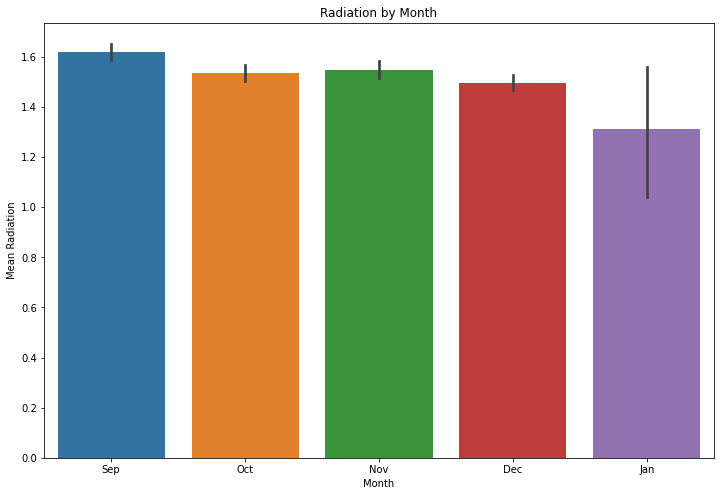

In [128]:
# Raditaion by Month
plt.rcParams['figure.figsize'] = 12, 8
ax = sns.barplot(data=df, x='month_name', y='Radiation')
ax.set(title='Radiation by Month', ylabel='Mean Radiation', xlabel='Month')
plt.show()

**We can see from above plot that the radiation level is high during summer and goes on decreasing as we proceed to fall**

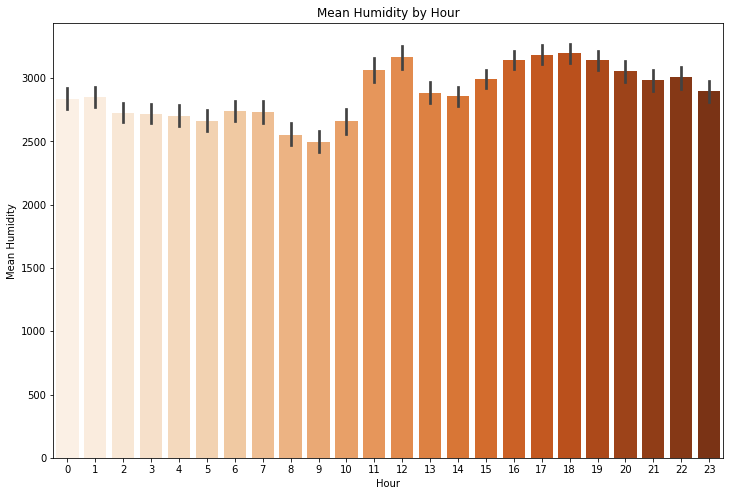

In [129]:
# Humidity by Hour
plt.rcParams['figure.figsize'] = 12, 8
ax = sns.barplot(data=df, x='hour', y='Humidity', palette = 'Oranges')
ax.set(title='Mean Humidity by Hour', ylabel='Mean Humidity', xlabel='Hour')
plt.show()

**From above bar plot we can say that humidity is fluctuating during the day and there is no proper pattern**

**Analyzing data further over a week period of time (10-01-2016 --- 10-08-2016)**

In [130]:
#Using Pytz to brings the Olson tz database into Python and thus supports almost all time zones.
import pytz
HItz = pytz.timezone(zone='US/Hawaii')
DatetimeHI = df['UNIXTime'].apply(lambda x: 
                                 datetime.datetime.utcfromtimestamp(x).replace(tzinfo=pytz.utc).astimezone(HItz))
temp_data = df.copy()
temp_data['DatetimeHI'] = DatetimeHI

In [131]:
# extract one week of data
weekendmarker = datetime.datetime(2016,9, 8).replace(tzinfo=HItz)
weekonedata = df[df['HawaiiDateTime'] < weekendmarker]


In [132]:
def abstract_week_plot(ax, dates, col, colname):
    # This functions takes in column of data and 
    # spits out axis with one week of data which then can be added to another plot
    
    # Colorize predictor vs other features
    if colname == 'Radiation':
        plt_color = 'red'
    else:
        plt_color = 'orange'
    
    # plot the data
    ax.plot(dates, col, c=plt_color)
    
    # format
    ax.set_title('{colname} 09/1/2016 - 09/8/2016'.format(colname=colname))
    ax.set_ylabel('{colname} Level'.format(colname=colname))
    ax.set_xlabel('Date')
    
    # rotation
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    
    return ax

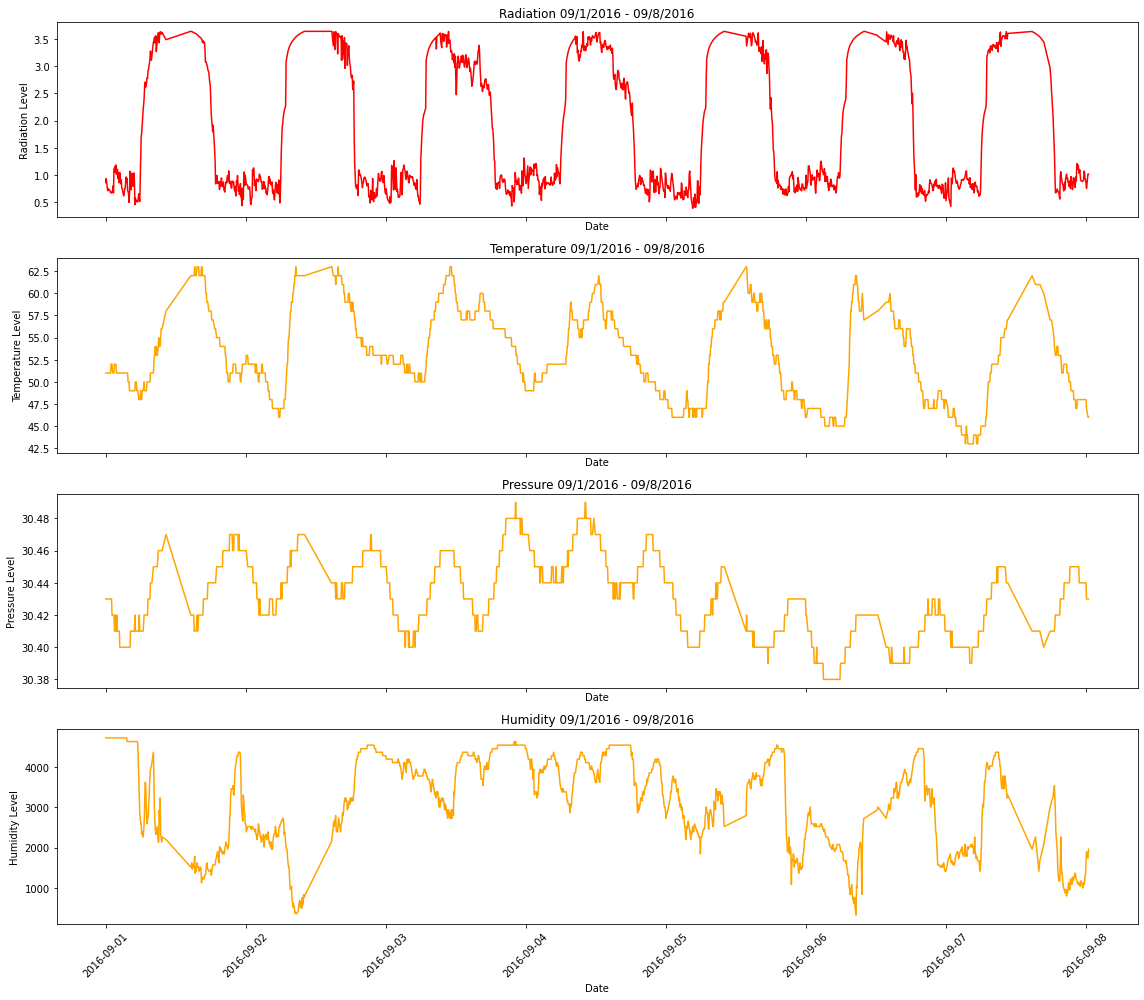

In [133]:
# make plot larger
plt.rcParams['figure.figsize'] = 16, 14

# loop over all columns important in data
ts_cols = ['Radiation', 'Temperature', 'Pressure', 'Humidity']
fig, axes = plt.subplots(len(ts_cols), sharex=True)
for i, ax in enumerate(axes):
    ax = abstract_week_plot(ax, weekonedata['HawaiiDateTime'], weekonedata[ts_cols[i]], ts_cols[i])

# prevent squashing
fig.tight_layout()


**From above graph we can infer below important points:**
     
- Temperature and Radiation have a very close connection. Oscillations appear to be quite in step.
- Pressure is also cyclic but has a different period than radiation.
- Humidity appear to be noisy.


**Linear Regression Model**



In [134]:
#import the required functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Train Test Split**

Test data is 20% while rest data we are using here is to train the model

In [135]:
#Allocating the dataframes into x and y
X = df[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', "Speed"]]
y = df[['Radiation']]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [137]:
X_train

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
8249,51.0,30.45,4359.569949,95.20,1.12
21416,46.0,30.44,3533.964343,103.17,12.37
27688,55.0,30.25,2200.994237,306.76,11.25
25472,45.0,30.37,3853.966691,181.54,4.50
8431,55.0,30.42,4623.876571,21.70,2.25
...,...,...,...,...,...
3600,54.0,30.48,3612.683760,241.79,6.75
7447,50.0,30.43,4446.820511,125.55,9.00
31802,40.0,30.38,4102.931075,154.71,5.62
11190,60.0,30.47,1003.320606,27.11,4.50


**Model Buliding**

In [138]:
X_test

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
1424,45.0,30.38,2018.862208,164.79,6.75
10180,53.0,30.41,1519.029694,174.95,5.62
8352,52.0,30.44,4102.931075,173.60,2.25
9333,51.0,30.41,3456.099491,206.70,4.50
17942,53.0,30.48,244.840967,211.78,6.75
...,...,...,...,...,...
18007,50.0,30.42,266.314887,224.14,6.75
20153,54.0,30.43,4359.569949,38.90,7.87
9227,57.0,30.45,3692.257470,27.55,3.37
605,50.0,30.42,3936.101673,217.15,5.62


In [139]:
y_train

,Radiation
8249,0.233196
21416,0.202638
27688,3.583254
25472,2.157919
8431,3.235260
...,...
3600,3.347952
7447,0.248042
31802,0.154478
11190,3.561922


In [140]:
#list to keep our results
result_acc = []

In [141]:
#Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

**Predicting the Solar Radiation level**

In [142]:
preds = lm.predict(X_test)
preds

array([[0.67454096],
       [1.92969523],
       [1.72142299],
       ...,
       [2.78399003],
       [1.45779802],
       [0.55913597]])

**Let's find out the mean square and root mean square error and print the Best possible score**

In [143]:
print('MSE: ', metrics.mean_squared_error(y_test, preds))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('Score: ', lm.score(X,y))
acc_Linear_Reg = lm.score(X,y)
result_acc.append(round(acc_Linear_Reg*100,2))

MSE:  1.091754599023056
RMSE:  1.0448706135321522
Score:  0.4890835090993355


**Let's see the actual and predicted values plot**

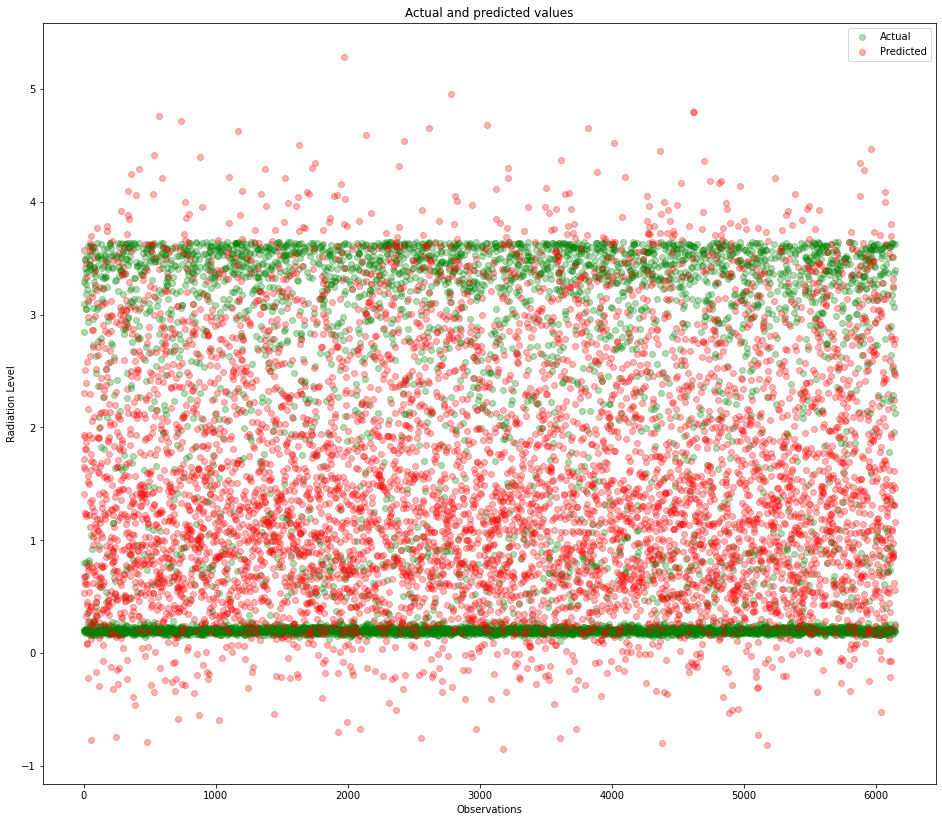

In [144]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'green', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, preds.size), y=preds, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Radiation Level')
plt.legend()
plt.show()

**Decision Tree Regression Model**

In [145]:
#Importing the neccesary functions
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor()

**Predicting the solar radiation level**

In [146]:
#Decision Tree Regression
Decision_pred= dt_reg.predict(X_test)
Decision_pred

array([0.83457717, 0.21038884, 0.20263804, ..., 2.81770264, 2.17348595,
       0.24804238])

**Let's find out the mean square and root mean square error and print the Best possible score**

In [147]:
print('MSE: ', metrics.mean_squared_error(y_test, Decision_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, Decision_pred)))
print('Score: ', dt_reg.score(X,y))

MSE:  1.1836565929791374
RMSE:  1.0879598305907885
Score:  0.8910341808454099


In [148]:
acc_Decision_Tree = dt_reg.score(X,y)
result_acc.append(round(acc_Decision_Tree*100,2))

**Let's see actual and predicted values plot**

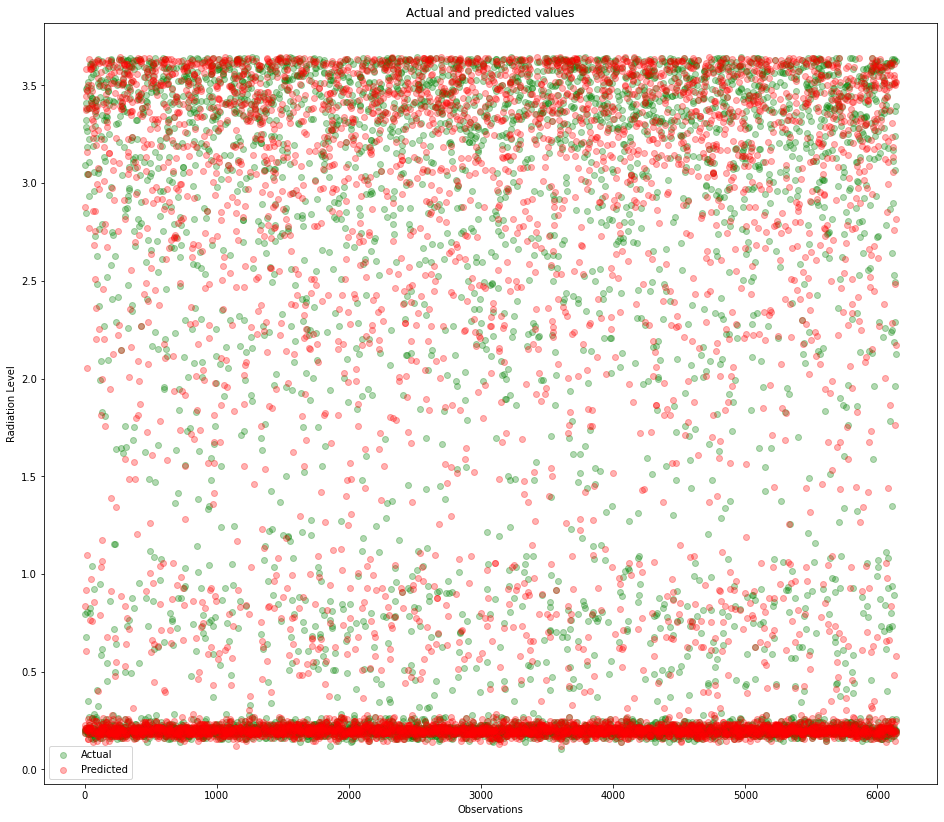

In [149]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'green', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, Decision_pred.size), y=Decision_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Radiation Level')
plt.legend()
plt.show()

**Random Forest Regression Model**

In [150]:
#Lets import the neccesary functions
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)


RandomForestRegressor()

**Predicting the solar radiation level**

In [151]:
#Random Forest Regression
randomforest_pred= rf_reg.predict(X_test)
randomforest_pred

array([0.7461994 , 0.50983087, 0.9375043 , ..., 2.49989652, 1.67645057,
       1.36295383])

**Let's find out the mean square and root mean square error and print the Best possible score** 

In [152]:
print('MSE: ', metrics.mean_squared_error(y_test, randomforest_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, randomforest_pred)))
print('Score: ', rf_reg.score(X,y))

MSE:  0.6040808473651142
RMSE:  0.7772263810275062
Score:  0.913374973524604


In [153]:
acc_Random_Forest = rf_reg.score(X,y)
result_acc.append(round(acc_Random_Forest*100,2))

**Let's see actual and predicted values plot**

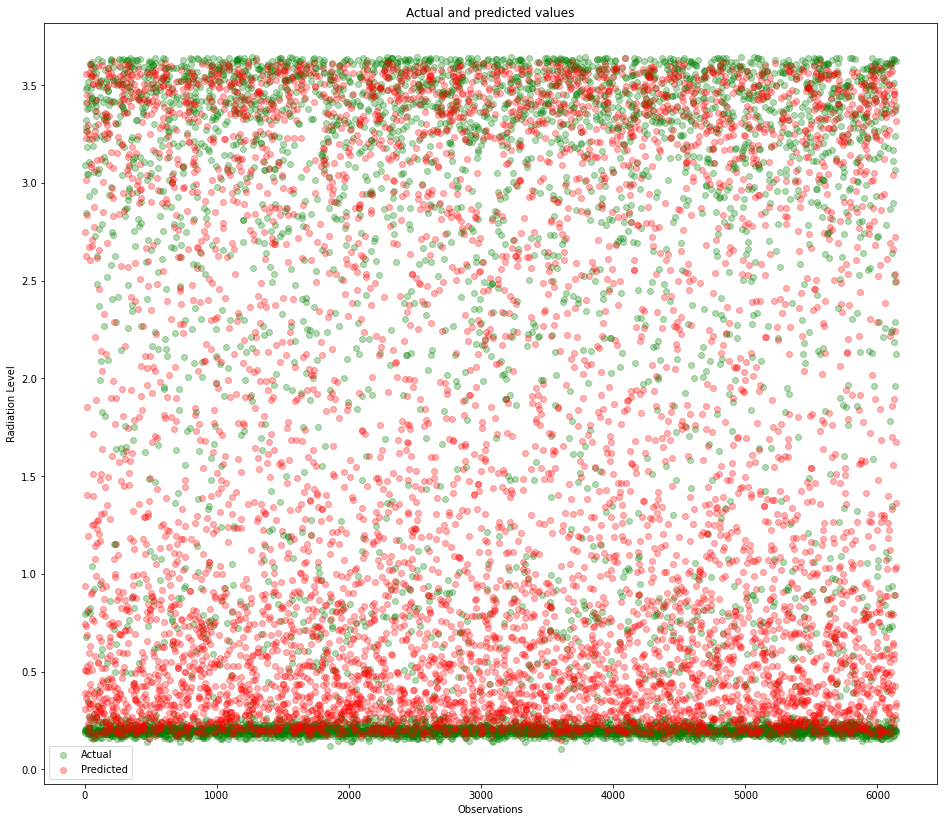

In [154]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'green', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, randomforest_pred.size), y=randomforest_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Radiation Level')
plt.legend()
plt.show()

In [155]:
#Lets store the model results
results = pd.DataFrame({"Model Result":result_acc,
                        "Models":["LogisticRegression",
                                  "DecisionTree",
                                  "RandomForest"]})


In [156]:
#Lets check the results
results

,Model Result,Models
0,48.91,LogisticRegression
1,89.10,DecisionTree
2,91.34,RandomForest


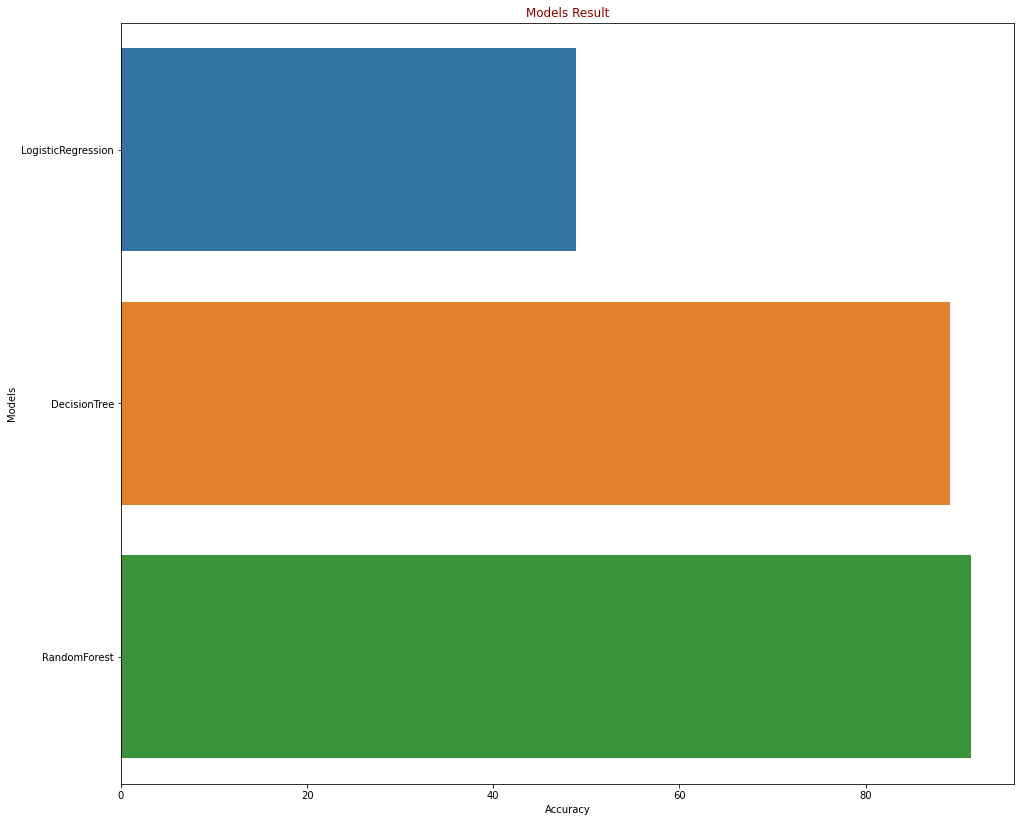

In [157]:
#Lets make a Bar Plot for the model results
g = sns.barplot("Model Result", "Models", data = results)
g.set_xlabel("Accuracy")
g.set_title("Models Result", color = "darkred")
plt.show()

**Based on above results we can say that Random Forest Regressor gives the best score.**